KeyboardInterrupt: 

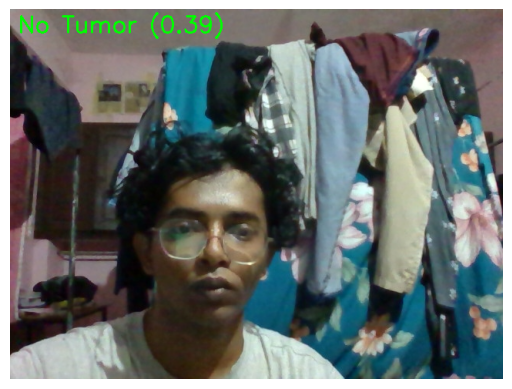

In [1]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Simulated brain tumor prediction
def simulate_brain_tumor_prediction(frame):
    image = cv2.resize(frame, (224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)

    confidence = np.random.rand()
    label = "Tumor Detected" if confidence > 0.5 else "No Tumor"
    color = (255, 0, 0) if label == "Tumor Detected" else (0, 255, 0)
    return label, confidence, color

# Start webcam and display
cap = cv2.VideoCapture(0)
print("Press 'q' to stop the webcam.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break

    frame = cv2.flip(frame, 1)
    label, confidence, color = simulate_brain_tumor_prediction(frame)
    cv2.putText(frame, f"{label} ({confidence:.2f})", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Display using matplotlib
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    clear_output(wait=True)
    plt.imshow(rgb_frame)
    plt.axis('off')
    display(plt.gcf())

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
